<a href="https://colab.research.google.com/github/Kgomez41/Data-110/blob/main/Titanic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd



In [2]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

In [3]:
# View the first few rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


As a result, the Titanic dataset provides a detailed breakdown of the passengers aboard the Titanic. It contains information such as their age, gender, ticket details, and whether they survived. There are several main columns in the table, including survived (did they survive? ), pclass (1st, 2nd, or 3rd class), sex (male or female), and age.
There is a class column that sorts passengers into First, Second, or Third class, and who labels them as a man, woman, or kid. It includes such items as adult_male (if they were a grown man), deck (where they slept), alive (a simple "yes" or "no" for survival), and alone (if they were traveling alone) as well. The data makes it super easy to examine how factors such as class, age, or gender may have influenced survival rates.


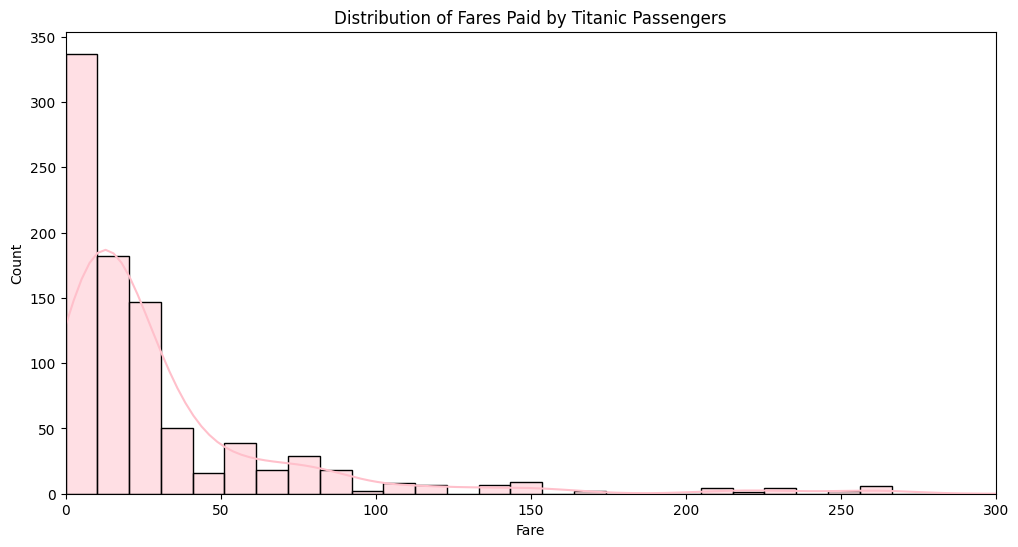

In [17]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Set figure size
plt.figure(figsize=(12, 6))

# Histogram with KDE overlay
sns.histplot(titanic['fare'], bins=50, kde=True, color="pink", edgecolor="black")

# Labels and title
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Distribution of Fares Paid by Titanic Passengers")
plt.xlim(0, 300)  # Limit x-axis to remove extreme outliers for better visualization

# Show the plot
plt.show()

Most passengers pay lower fares due to the fare distribution being heavily skewed to the right. This was probably a group of high-status, wealthy individuals who were enjoying the luxuries of first class. It would seem that there is a clear distinction between the budget-conscious crowd and the elite traveler.

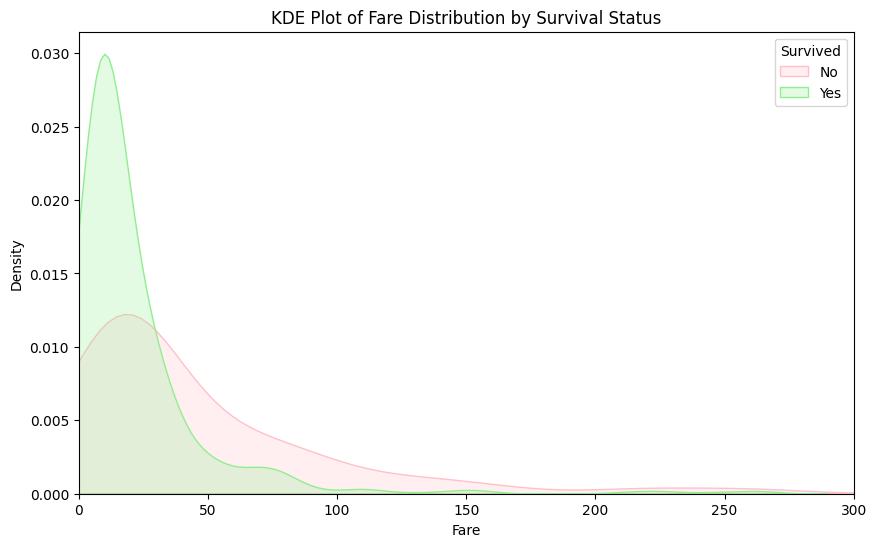

In [31]:


# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Set figure size
plt.figure(figsize=(10, 6))

# KDE plot for fare distribution, separated by survival status
sns.kdeplot(data=titanic, x="fare", hue="survived", fill=True, common_norm=False, palette=["lightgreen", "pink"])

# Add labels and title
plt.xlabel("Fare")
plt.ylabel("Density")
plt.title("KDE Plot of Fare Distribution by Survival Status")
plt.xlim(0, 300)  # Limit x-axis to remove extreme outliers for better visualization
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

To go more in depth, the fare distribution shows that survivors generally paid higher fares than non-survivors, meaning folks who shelled out more cash had better odds of making it. This pretty much points to a strong link between socioeconomic status and survival—wealthier passengers (probably in first class) had better access to lifeboats and safer spots on the ship. Money and class certainly played a significant role in determining who survived.

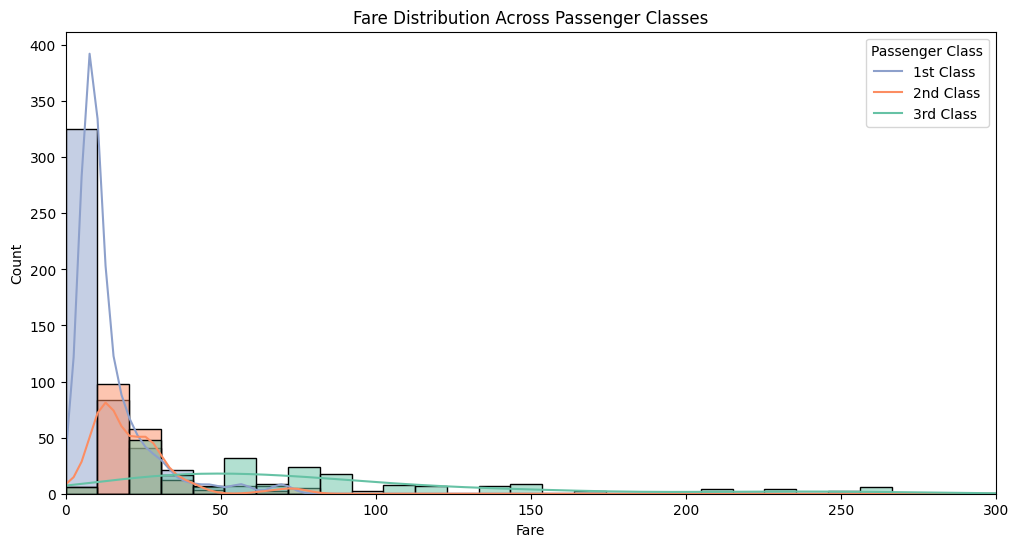

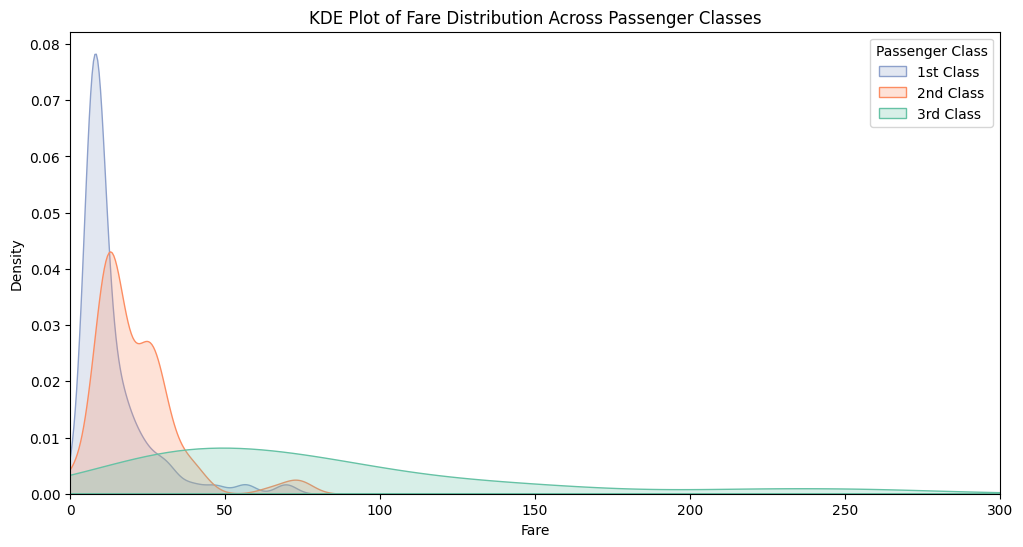

In [27]:


# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Set figure size
plt.figure(figsize=(12, 6))

# Histogram of fare distribution by passenger class
sns.histplot(titanic, x="fare", hue="pclass", bins=50, kde=True, palette="Set2", edgecolor="black")

# Labels and title
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Fare Distribution Across Passenger Classes")
plt.xlim(0, 300)  # Limiting x-axis for better visualization
plt.legend(title="Passenger Class", labels=["1st Class", "2nd Class", "3rd Class"])
plt.show()

# KDE plot of fare distribution by survival status and class
plt.figure(figsize=(12, 6))
sns.kdeplot(data=titanic, x="fare", hue="pclass", fill=True, common_norm=False, palette="Set2")

# Labels and title
plt.xlabel("Fare")
plt.ylabel("Density")
plt.title("KDE Plot of Fare Distribution Across Passenger Classes")
plt.xlim(0, 300)
plt.legend(title="Passenger Class", labels=["1st Class", "2nd Class", "3rd Class"])
plt.show()

There was a better chance of survival for first-class passengers, probably since they got priority access to the lifeboats. Third-class passengers had the lowest survival rates, showing how unfair this situation was since they were stuck in the lower parts of the ship and had less chance of making it to the lifeboats. Money and class were huge factors in who lived and who didn't, showing how privilege was part of the problem.




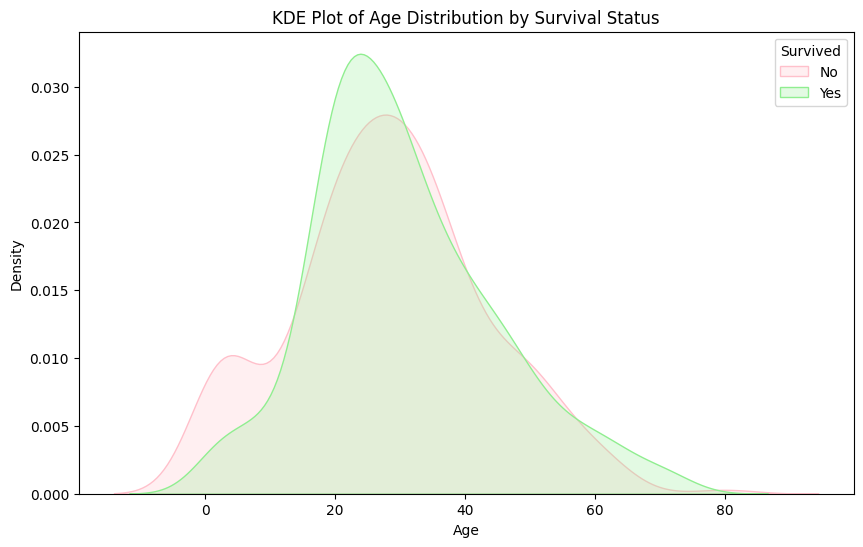

In [30]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Set figure size
plt.figure(figsize=(10, 6))

# KDE plot for age distribution by survival status
sns.kdeplot(data=titanic, x="age", hue="survived", fill=True, common_norm=False, palette=["lightgreen", "pink"])

# Labels and title
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("KDE Plot of Age Distribution by Survival Status")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()



People's chances of surviving decreased with age, especially those in their 20s and 40s. Most likely, they were passed over for lifeboats in order to accommodate women and children.

In general, survival rates were quite low for those over the age of 50. It’s likely that physical challenges made it harder for them to reach the lifeboats in time during all the chaos.
A major factor determining who made it was age - kids had the best chance, while older adults faced challenges.


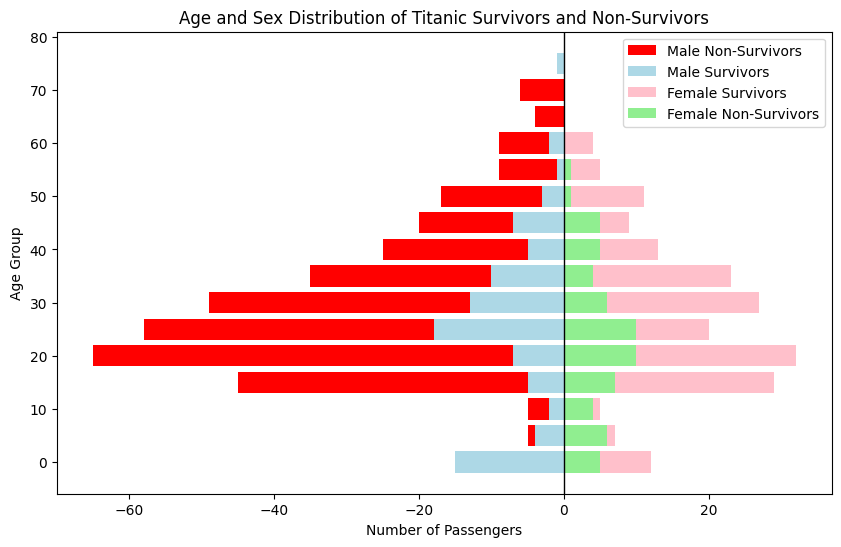

In [34]:

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Drop missing age values for accurate visualization
titanic = titanic.dropna(subset=["age"])

# Separate data by survival and sex
male_survivors = titanic[(titanic["sex"] == "male") & (titanic["survived"] == 1)]
male_non_survivors = titanic[(titanic["sex"] == "male") & (titanic["survived"] == 0)]
female_survivors = titanic[(titanic["sex"] == "female") & (titanic["survived"] == 1)]
female_non_survivors = titanic[(titanic["sex"] == "female") & (titanic["survived"] == 0)]

# Define age bins
bins = np.arange(0, 81, 5)  # Age groups from 0 to 80 in 5-year bins

# Compute histogram values
male_surv_counts, _ = np.histogram(male_survivors["age"], bins=bins)
male_non_surv_counts, _ = np.histogram(male_non_survivors["age"], bins=bins)
female_surv_counts, _ = np.histogram(female_survivors["age"], bins=bins)
female_non_surv_counts, _ = np.histogram(female_non_survivors["age"], bins=bins)

# Convert counts to negative values for the left side of the pyramid
male_surv_counts *= -1
male_non_surv_counts *= -1

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
ax.barh(bins[:-1], male_non_surv_counts, height=4, color="red", label="Male Non-Survivors")
ax.barh(bins[:-1], male_surv_counts, height=4, color="lightblue", label="Male Survivors")
ax.barh(bins[:-1], female_surv_counts, height=4, color="pink", label="Female Survivors")
ax.barh(bins[:-1], female_non_surv_counts, height=4, color="lightgreen", label="Female Non-Survivors")

# Labels and title
ax.set_xlabel("Number of Passengers")
ax.set_ylabel("Age Group")
ax.set_title("Age and Sex Distribution of Titanic Survivors and Non-Survivors")

# Set x-axis direction
ax.set_xlim([-max(abs(male_non_surv_counts)) - 5, max(female_surv_counts) + 5])
ax.axvline(0, color="black", linewidth=1)  # Vertical line at center

# Add legend
ax.legend(loc="upper right")

# Show plot
plt.show()



**In conclusion.**

For almost every age group, there were more women who survived (pink bars) than those who did not (light green bars). In line with the whole "women and children first" evacuation policy, women were given priority, and the numbers reflect that.
It is apparent from the graph that the red bars (male non-survivors) are significantly larger than the blue bars (male survivors), meaning that most men did not survive. In general, young boys had a better chance than adult men, but being on the Titanic did not improve your chances in the long run.

Women and kids had a much better shot at survival thanks to evacuation policies, while men—especially those in their 20s to 40s—had the highest fatality rate. The pyramid histogram really drives home the huge gender gap in who survived and who didn’t. It’s a stark reminder of how the disaster played out differently for different groups.